### Dict

| Column Name   | Description                                                                 |
|---------------|-----------------------------------------------------------------------------|
| common name   | It is the name of the plant in the local region                             |
| family        | This column tells about the family of the plant                            |
| categories    | Category of family                                                         |
| origin        | The origin of the plant where the plant was found or grown first           |
| climate       | A climate which is suitable for that plant                                 |
| zone          | Latitudes and longitudes                                                  |
| img_url       | An image URL of the plant                                                  |


Refs
- https://www.kaggle.com/datasets/iottech/plant/data
- https://pmc.ncbi.nlm.nih.gov/articles/PMC10220692/

### Data Prep

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [16]:
data = pd.read_csv('./datasets/plants.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head(20)

,common_name,family,categories,origin,climate,zone,img_url
0,Janet Craig,Liliaceae,Dracaena,Cultivar,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
1,Lady palm,Arecaceae,Palm,China,Subtropical,"[11, 9]",http://www.tropicopia.com/house-plant/thumbnai...
2,"Tailflower , Wax flower",Araceae,Anthurium,Cultivar,Tropical,[11],http://www.tropicopia.com/house-plant/thumbnai...
3,Elephant ear,Araceae,Other,Hybrid,Tropical humid,[11],http://www.tropicopia.com/house-plant/thumbnai...
4,Malaysian Dracaena,Liliaceae,Dracaena,Cultivar,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
5,Chinese Evergreen,Araceae,Aglaonema,Hybrid,Tropical,[11],http://www.tropicopia.com/house-plant/thumbnai...
6,Malaysian Dracaena,Liliaceae,Dracaena,Cultivar,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
7,"Herringbone , Pink praying plant",Marantaceae,Hanging,Brazil,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
8,Guzmania,Bromeliaceae,Bromeliad,Cultivar,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
9,Chinese Evergreen,Araceae,Aglaonema,Hybrid,Tropical,[11],http://www.tropicopia.com/house-plant/thumbnai...


In [13]:

na_values = data.isnull().sum()
duplicated_values = data.duplicated().sum()

print(f"Missing values:\n{na_values}")
print(f"\nDuplicated values: {duplicated_values}")

Missing values:
common_name    21
family          0
categories      0
origin          2
climate         0
zone            0
img_url         0
dtype: int64

Duplicated values: 0


In [20]:
data.dropna(subset=['common_name'], inplace=True)
missing_values = data.isnull().sum()
print(f"\nMissing values:\n{missing_values}")


Missing values:
common_name    0
family         0
categories     0
origin         2
climate        0
zone           0
img_url        0
dtype: int64


In [24]:
origin_values = data['origin'].value_counts()
origin_values

origin
Cultivar                              110
Hybrid                                 50
Mexico                                 22
Brazil                                 17
Madagascar                             17
South Africa                           16
Asia                                    9
India                                   8
China                                   8
Malaysia                                8
South Pacific                           7
Japan                                   6
Taiwan                                  5
Central America                         5
Australia                               4
Venezuela                               4
Africa                                  4
New Calidonia                           3
Canaries                                3
Philippines                             3
Ouest Africa                            2
Guyana                                  2
Central Africa                          2
Rodrigue Island            

In [ ]:
data['origin'] = data['origin'].str.strip()

In [44]:
brazil_plants = data[data['origin'] == 'Brazil'].drop(columns=['origin']).reset_index(drop=True)
brazil_plants.head(20)

,common_name,family,categories,climate,zone,img_url
0,"Herringbone , Pink praying plant",Marantaceae,Hanging,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
1,"Maindenhair , Delta maidenhair",Polypodiaceae,Fern,Tropical,"[10, 8]",http://www.tropicopia.com/house-plant/thumbnai...
2,Lacy tree-philodendron,Araceae,Philodendron,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
3,Silver vase,Bromeliaceae,Bromeliad,Tropical humid,[10],http://www.tropicopia.com/house-plant/thumbnai...
4,Parrot palm,Arecaceae,Palm,Tropical humid,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
5,Stromante,Marantaceae,Foliage plant,Tropical,[11],http://www.tropicopia.com/house-plant/thumbnai...
6,Phrynium,Marantaceae,Foliage plant,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
7,Tree-Cereus,Cactaceae,Cactus & Succulent,Arid Tropical,"[11, 9]",http://www.tropicopia.com/house-plant/thumbnai...
8,"Green prayer plant , Herringbone",Marantaceae,Hanging,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...
9,Tree-Cereus,Cactaceae,Cactus & Succulent,Arid Tropical,"[11, 9]",http://www.tropicopia.com/house-plant/thumbnai...


In [45]:
brazil_plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   common_name  17 non-null     object
 1   family       17 non-null     object
 2   categories   17 non-null     object
 3   climate      17 non-null     object
 4   zone         17 non-null     object
 5   img_url      17 non-null     object
dtypes: object(6)
memory usage: 944.0+ bytes


In [ ]:
brazil_plants['selected_name'] = brazil_plants['common_name'].str.split(' , ').str[0]
brazil_plants.head()


,common_name,family,categories,climate,zone,img_url,selected_name
0,"Herringbone , Pink praying plant",Marantaceae,Hanging,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Herringbone
1,"Maindenhair , Delta maidenhair",Polypodiaceae,Fern,Tropical,"[10, 8]",http://www.tropicopia.com/house-plant/thumbnai...,Maindenhair
2,Lacy tree-philodendron,Araceae,Philodendron,Tropical,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Lacy tree-philodendron
3,Silver vase,Bromeliaceae,Bromeliad,Tropical humid,[10],http://www.tropicopia.com/house-plant/thumbnai...,Silver vase
4,Parrot palm,Arecaceae,Palm,Tropical humid,"[11,10]",http://www.tropicopia.com/house-plant/thumbnai...,Parrot palm


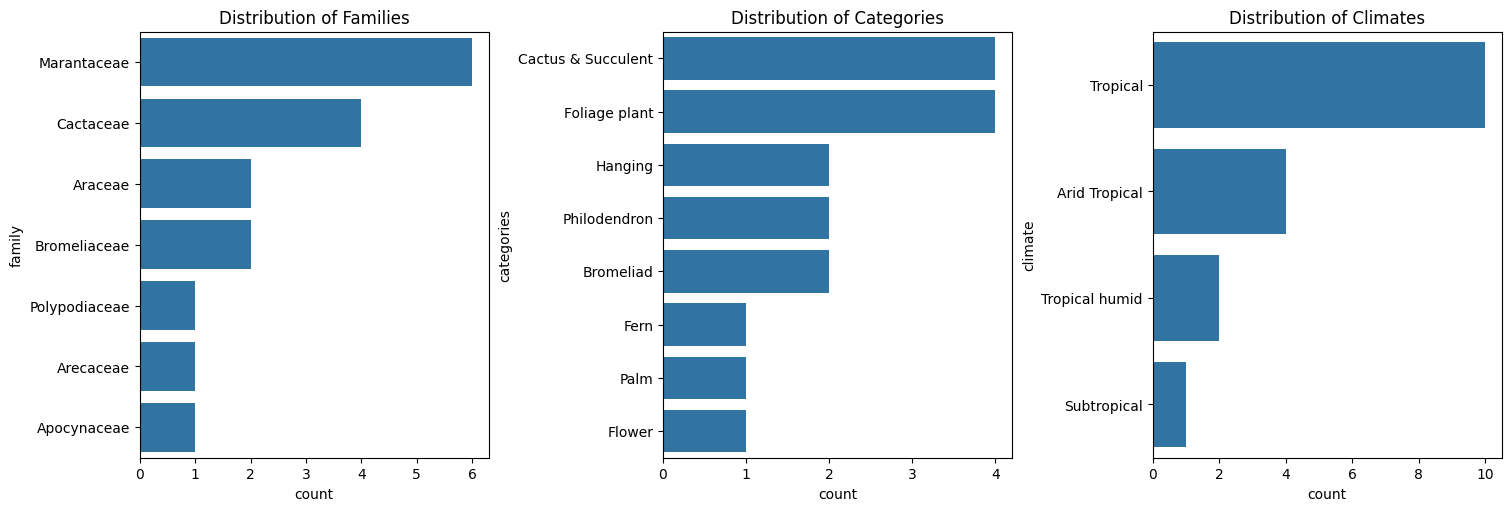

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)


axes[0].set_title('Distribution of Families')
sns.countplot(data=brazil_plants, y='family', order=brazil_plants['family'].value_counts().index, ax=axes[0])

axes[1].set_title('Distribution of Categories')
sns.countplot(data=brazil_plants, y='categories', order=brazil_plants['categories'].value_counts().index, ax=axes[1])

axes[2].set_title('Distribution of Climates')
sns.countplot(data=brazil_plants, y='climate', order=brazil_plants['climate'].value_counts().index, ax=axes[2])

plt.show()

In [60]:
list(brazil_plants['selected_name'].unique())


['  Herringbone',
 '  Maindenhair',
 '  Lacy tree-philodendron  ',
 '  Silver vase  ',
 '  Parrot palm  ',
 '  Stromante  ',
 '  Phrynium  ',
 '  Tree-Cereus  ',
 '  Green prayer plant',
 '  Monster cactus  ',
 '  Coral berry  ',
 '  Golden Trumpet  ',
 '  Velvet Calathea  ']